In [46]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf


In [47]:
#  Import and read the charity_data.csv.
import pandas as pd
retail_df = pd.read_csv(r"C:\Users\jariv\Project4\online_retail.csv")
retail_df.head()

C:\Users\jariv\AppData\Local\Temp\ipykernel_48108\1313707847.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  retail_df = pd.read_csv(r"C:\Users\jariv\Project4\online_retail.csv")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [48]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail_df.isnull().sum())/len(retail_df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [49]:
# Droping rows having missing values

retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [50]:
retail_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [51]:
# Drop rows with "POST" in the StockCode column
retail_df = retail_df[retail_df['StockCode'] != 'POST']

# Drop rows where InvoiceNo column starts with "C"
retail_df = retail_df[~retail_df['InvoiceNo'].astype(str).str.startswith('C')]

In [52]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396825 entries, 0 to 532617
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396825 non-null  object 
 1   StockCode    396825 non-null  object 
 2   Description  396825 non-null  object 
 3   Quantity     396825 non-null  int64  
 4   InvoiceDate  396825 non-null  object 
 5   UnitPrice    396825 non-null  float64
 6   CustomerID   396825 non-null  float64
 7   Country      396825 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.2+ MB


In [53]:
from datetime import date
retail_df['CustomerID'] = retail_df['CustomerID'].astype(str)
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype(str)
retail_df['StockCode'] = retail_df['StockCode'].astype(str)
retail_df['Description'] = retail_df['Description'].astype(str)
retail_df['Country'] = retail_df['Country'].astype(str)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396825 entries, 0 to 532617
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396825 non-null  object 
 1   StockCode    396825 non-null  object 
 2   Description  396825 non-null  object 
 3   Quantity     396825 non-null  int64  
 4   InvoiceDate  396825 non-null  object 
 5   UnitPrice    396825 non-null  float64
 6   CustomerID   396825 non-null  object 
 7   Country      396825 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.2+ MB


In [54]:
# Convert 'InvoiceDate' column to datetime data type
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Verify the data types of the DataFrame
retail_df.info()

C:\Users\jariv\AppData\Local\Temp\ipykernel_48108\2205119629.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
Index: 396825 entries, 0 to 532617
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396825 non-null  object        
 1   StockCode    396825 non-null  object        
 2   Description  396825 non-null  object        
 3   Quantity     396825 non-null  int64         
 4   InvoiceDate  396825 non-null  datetime64[ns]
 5   UnitPrice    396825 non-null  float64       
 6   CustomerID   396825 non-null  object        
 7   Country      396825 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.2+ MB


In [55]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format = '%m/%d/%Y %H:%M')
#12/1/2010 8:26

In [56]:
# Determine the frequency of CustomerID
customer_frequency = retail_df['CustomerID'].value_counts()

# Display the frequency
print(customer_frequency)

CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4595
14606.0    2699
           ... 
17923.0       1
15389.0       1
14576.0       1
16078.0       1
17102.0       1
Name: count, Length: 4339, dtype: int64


In [78]:
# Create a new DataFrame from the frequency Series
customer_frequency_df = pd.DataFrame(customer_frequency)
customer_frequency_df.reset_index(inplace=True)
customer_frequency_df.columns = ['CustomerID', 'CustFrequency']

# Display the new DataFrame
print(customer_frequency_df.head())

  CustomerID  CustFrequency
0    17841.0           7847
1    14911.0           5677
2    14096.0           5111
3    12748.0           4595
4    14606.0           2699


In [57]:
# Determine the number of unique values in each column.
unique_counts = retail_df.nunique()
print(unique_counts)

InvoiceNo      18484
StockCode       3664
Description     3876
Quantity         302
InvoiceDate    17237
UnitPrice        426
CustomerID      4339
Country           37
dtype: int64


In [58]:
# count the number of unique invoice numbers for each customer
frequency_df = retail_df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency_df.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,27
3,12349.0,72
4,12350.0,16


In [79]:
# count the number of unique invoice numbers for each customer
freq_df = retail_df.groupby('CustomerID')['StockCode'].count().reset_index()
freq_df.head()

,CustomerID,StockCode
0,12346.0,1
1,12347.0,182
2,12348.0,27
3,12349.0,72
4,12350.0,16


In [59]:
#add new column Total Price
retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [80]:
# Merge retail_df with frequency_df on 'CustomerID'
merged_df = pd.merge(retail_df, frequency_df, on='CustomerID', how='left')

# Merge the merged dataframe with cust_frequency_df on 'CustomerID'
merged_df = pd.merge(merged_df, customer_frequency_df, on='CustomerID', how='left')

merged_df = pd.merge(merged_df, freq_df, on='CustomerID', how='left')
# Display the merged dataframe
print(merged_df.head())

  InvoiceNo_x StockCode_x                          Description  Quantity  \
0      536365       21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
1      536365       22752         SET 7 BABUSHKA NESTING BOXES         2   
2      536365       71053                  WHITE METAL LANTERN         6   
3      536365      84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
4      536365      84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   

          InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       4.25    17850.0  United Kingdom       25.50   
1 2010-12-01 08:26:00       7.65    17850.0  United Kingdom       15.30   
2 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34   

   InvoiceNo_y  CustFrequency  StockCode_y  
0          297            297          297  
1 

In [60]:
# # Determine the value counts for InvoiceNo and CustomerID
# invoice_counts = retail_df['Frequency'].value_counts()
# customer_counts = retail_df['CustomerID'].value_counts()

# # Define the threshold for less frequent values
# threshold = 100  # You can adjust this threshold based on your data

# # Identify less frequent InvoiceNo and CustomerID values
# infrequent_invoices = invoice_counts[invoice_counts < threshold].index
# infrequent_customers = customer_counts[customer_counts < threshold].index

# # Replace less frequent values with "Other"
# retail_df.loc[retail_df['Frequency'].isin(infrequent_invoices), 'Frequency'] = 'Other'
# retail_df.loc[retail_df['CustomerID'].isin(infrequent_customers), 'CustomerID'] = 'Other'

In [61]:
#Calculate the total purchase amount for each customer
total_purchase_amount = retail_df.groupby('CustomerID')['TotalPrice'].sum().reset_index()

In [62]:
#determine the number of days since the customer's last purchase
max_purchase_date = retail_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
max_purchase_date['DaysSinceLastPurchase'] = (pd.to_datetime('today') - max_purchase_date['InvoiceDate']).dt.days

In [85]:
# index_columns = merged_df.index

# # Convert the index to a list if needed
# index_columns_list = index_columns.tolist()

# print(index_columns_list)
merged_df.columns

Index(['InvoiceNo_x', 'StockCode_x', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'InvoiceNo_y',
       'CustFrequency', 'StockCode_y'],
      dtype='object')

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
# Step 1: Ensure the data is properly preprocessed and formatted

# Ensure there are no missing values
#retail_df.dropna(inplace=True)
# InvoiceNo_y  CustFrequency  StockCode_y 
# Step 2: Split the data into features (X) and target variable (y)
X = merged_df[['Quantity', 'InvoiceNo_y', 'CustFrequency', 'StockCode_y']]
y = merged_df['TotalPrice']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train a linear regression model
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model's performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 6642.569417889795
R^2 Score: -0.16061960221524973


In [64]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3486.8340062231914


In [65]:
print(X_train.shape)

(317460, 1)


In [70]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [73]:
# # Convert X_train to a NumPy array
# X_train_array = X_train.to_numpy()
# number_input_features = X_train_array.shape[1]

# # Alternatively, get the number of columns directly from the shape attribute
# number_input_features = X_train.shape[1]

# Define the model
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

# Create the Sequential model instance
nn_model = tf.keras.models.Sequential()

# Add the input and hidden layers
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Add the output layer with sigmoid activation
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Check the model summary
nn_model.summary()

c:\Users\jariv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 24)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# # Compile the model
# nn_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
fit_model = nn_model.fit(X_train, y_train, epochs=20)

Epoch 1/50
9921/9921 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 2.7393e-05 - loss: -7406100.5000
Epoch 2/50
9921/9921 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 3.2729e-05 - loss: -5480221.0000
Epoch 3/50
9921/9921 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 4.1664e-05 - loss: -4517030.0000
Epoch 4/50
9921/9921 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 5.5028e-05 - loss: -7543977.5000
Epoch 5/50
9921/9921 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 3.4751e-05 - loss: -7497597.0000
Epoch 6/50
9921/9921 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 3.7578e-05 - loss: -25299862.0000
Epoch 7/50
9921/9921 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 3.5920e-05 - loss: -14699555.0000
Epoch 8/50
9921/9921 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 6.6089e-05 - loss: -9783527.0000
Epoch 9/50
9921/9921 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 6.1479e-05 - loss: -11771495.0000
Epoch 10/50
9921/9921 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 2.5621e-05 - loss: -16457272.

In [75]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2481/2481 - 4s - 2ms/step - accuracy: 0.0000e+00 - loss: -6.1195e+07
Loss: -61194812.0, Accuracy: 0.0


Class Distribution:
TotalPrice
15.00      20035
17.70       9174
16.50       8490
10.20       8028
19.80       7625
           ...  
27.60          1
24.38          1
1305.60        1
481.50         1
66.36          1
Name: count, Length: 2926, dtype: int64


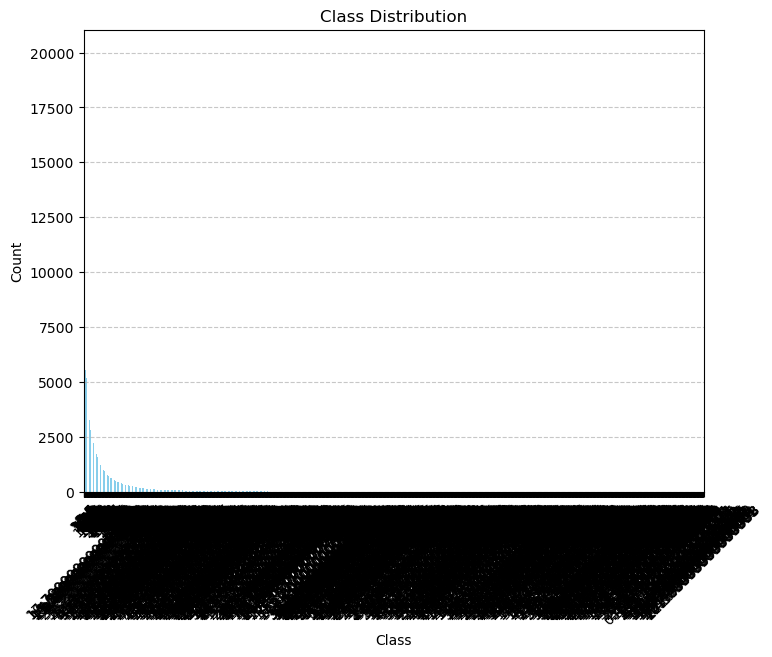

Class Ratios:
TotalPrice
15.00      0.050488
17.70      0.023119
16.50      0.021395
10.20      0.020231
19.80      0.019215
             ...   
27.60      0.000003
24.38      0.000003
1305.60    0.000003
481.50     0.000003
66.36      0.000003
Name: proportion, Length: 2926, dtype: float64


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'y' is your target variable
class_distribution = y.value_counts()
print("Class Distribution:")
print(class_distribution)

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate class ratios
class_ratios = y.value_counts(normalize=True)
print("Class Ratios:")
print(class_ratios)